# Cálculo retorno diário e acumulado

### 0. Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf

### 1. Construção da carteira e importação dos dados

In [4]:
# Determinando datas inicial e final do estudo

inicio = '2018-01-01'
fim = '2020-12-30'

In [5]:
# Determinando os ativos

ativos = ['PETR4.SA',
          'VALE3.SA',
          'BBDC4.SA',
          'ITSA4.SA',
          'ABEV3.SA',
          'WEGE3.SA',
          'CYRE3.SA',
          'UGPA3.SA',
          'TAEE4.SA',
          'BBAS3.SA'
          ]

In [6]:
# Determinandos os pesos de cada ativo

pesos = np.array([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])

In [7]:
# Importando dados da yahoo finances

carteira = yf.download(ativos, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [8]:
# verificando os dados

carteira.head()

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2018-01-02,18.143394,23.474611,15.054401,9.444441,6.252336,6.091882,3.955142,34.739544,28.455345,8.858921
2018-01-03,18.185217,23.774006,15.123607,9.486981,6.326026,6.147096,4.019122,34.396523,28.284828,8.724374
2018-01-04,18.084841,24.002119,15.371752,9.564976,6.445065,6.158139,3.926060,34.798214,28.400774,8.639394
2018-01-05,18.151760,24.002119,15.458815,9.713876,6.456404,6.194948,4.019122,34.870438,28.844112,8.674803
2018-01-08,18.118298,24.059151,15.454472,9.763510,6.450734,6.268565,4.019122,35.114155,29.485243,8.745617


<Axes: xlabel='Date'>

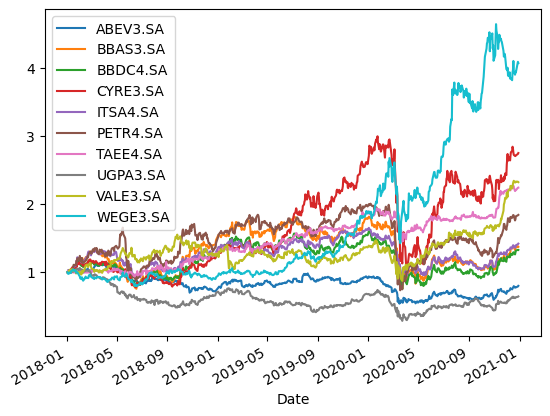

In [9]:
# normalizando os dados para plotar

(carteira/carteira.iloc[0]).plot()

### 2. Retorno diário e retorno acumulado

Retorno diário percentual

In [11]:
# Descobrindo variação percentual diária

retornos = carteira.pct_change()

In [12]:
carteira.pct_change()

,ABEV3.SA,BBAS3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,TAEE4.SA,UGPA3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.002305,0.012754,0.004597,0.004504,0.011786,0.009063,0.016177,-0.009874,-0.005992,-0.015188
2018-01-04,-0.005520,0.009595,0.016408,0.008221,0.018817,0.001796,-0.023155,0.011678,0.004099,-0.009741
2018-01-05,0.003700,0.000000,0.005664,0.015567,0.001759,0.005977,0.023704,0.002075,0.015610,0.004099
2018-01-08,-0.001843,0.002376,-0.000281,0.005110,-0.000878,0.011883,0.000000,0.006989,0.022227,0.008163
...,...,...,...,...,...,...,...,...,...,...
2020-12-21,-0.027743,-0.033504,-0.024247,-0.005886,-0.015571,-0.038434,-0.023194,-0.022756,-0.010706,-0.011301
2020-12-22,0.005837,0.013231,0.020331,-0.000348,0.001757,0.009622,0.005479,0.006900,0.000921,0.011248
2020-12-23,-0.000645,0.016453,0.022878,0.003484,0.023684,0.024560,0.000000,0.014989,0.004831,-0.002747


In [14]:
# Descobrindo variação diária ponderada

# Na função sum, Axis = 1 executa a soma nas linhas e Axis = 0 executa a soma nas colunas

(retornos*pesos).sum(axis = 1)

Date
2018-01-02    0.000000
2018-01-03    0.003013
2018-01-04    0.003220
2018-01-05    0.007816
2018-01-08    0.005375
                ...   
2020-12-21   -0.021334
2020-12-22    0.007498
2020-12-23    0.010749
2020-12-28    0.012944
2020-12-29    0.002019
Length: 741, dtype: float64

In [15]:
# retorno diário da carteira

retorno_carteira = (retornos*pesos).sum(axis = 1)

<Axes: xlabel='Date'>

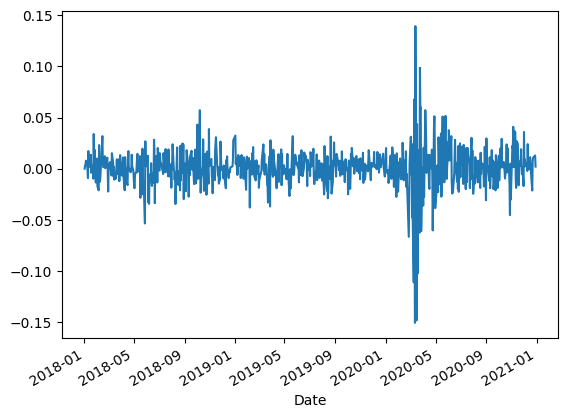

In [16]:
# Plotando o gráfico consegue se verificar as variações diárias no tempo

retorno_carteira.plot()

Retorno acumulado

In [17]:
# utilizando a função cumprod é possível fazer o produto acumulado dos valores

(1 + retorno_carteira).cumprod() - 1

Date
2018-01-02    0.000000
2018-01-03    0.003013
2018-01-04    0.006243
2018-01-05    0.014107
2018-01-08    0.019558
                ...   
2020-12-21    0.810271
2020-12-22    0.823844
2020-12-23    0.843448
2020-12-28    0.867309
2020-12-29    0.871080
Length: 741, dtype: float64

In [18]:
retorno_acumulado_carteira = (1 + retorno_carteira).cumprod() - 1

<Axes: xlabel='Date'>

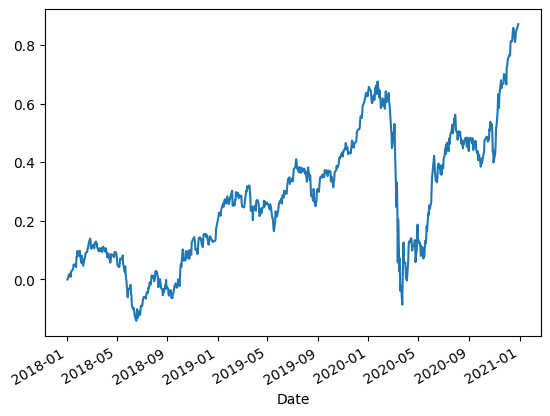

In [19]:
retorno_acumulado_carteira.plot()

### 3. Comparativo de desempenho

Importando dados do Ibov

In [20]:
ibov = yf.download('^BVSP', start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [21]:
ibov_retorno = ibov.pct_change()
retorno_acumulado_ibov = (1 + ibov_retorno).cumprod() - 1

Criando novo DataFrame para comparação

In [22]:
retorno_portfolio = pd.DataFrame()
retorno_portfolio['Retorno_carteira'] = retorno_acumulado_carteira
retorno_portfolio['IBOV'] = retorno_acumulado_ibov

# Tratando informações faltantes

retorno_portfolio = retorno_portfolio.dropna()


In [24]:
# Verificando com ficou o DataFram

retorno_portfolio


,Retorno_carteira,IBOV
Date,,
2018-01-03,0.003013,0.001335
2018-01-04,0.006243,0.009706
2018-01-05,0.014107,0.015149
2018-01-08,0.019558,0.019104
2018-01-09,0.018103,0.012492
...,...,...
2020-12-21,0.810271,0.489466
2020-12-22,0.823844,0.493728
2020-12-23,0.843448,0.513102


<Axes: xlabel='Date'>

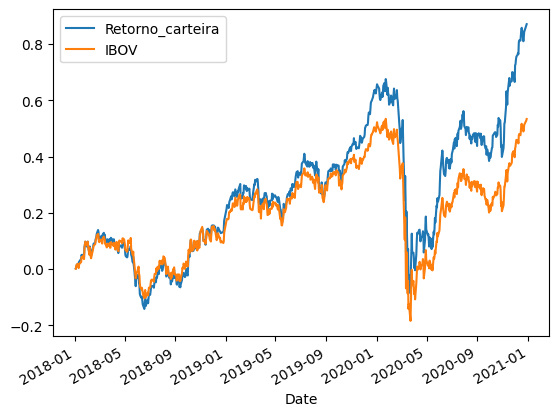

In [26]:
# Plotando o gráfico comparativo

retorno_portfolio.plot()